# Eine kleine Noncemusik
Noncesense Research Lab / Monero Archival Project

Feb 2019

Turning the time-dependent nonce distribution into music.

# Contributors
[NeptuneResearch](https://github.com/neptuneresearch),  [Isthmus](https://github.com/mitchellpkt)


Take a peek at the nonces

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import matplotlib.patches as patches
from copy import copy

## Import data Nonce

In [2]:
#df= pd.read_csv("../data/Blocks_alt_and_main_20190418.csv")
plot_alts = 0
data = pd.read_csv("../data/nonce-difficulty-1500000.csv")
data.head()

difficulty   height       nonce   timestamp
0   99795150438  1500000  2706726749  1517489351
1   99783354814  1500001  1079000424  1517489517
2   99709274306  1500002  2174764548  1517489551
3   99886467049  1500003  2686461817  1517489707
4  100119806561  1500004       12845  1517489729

## Plot the distribution of nonce values

Inspired by:

__Antoine Le Calvez__

@khannib https://twitter.com/khannib/status/1082280569449447424

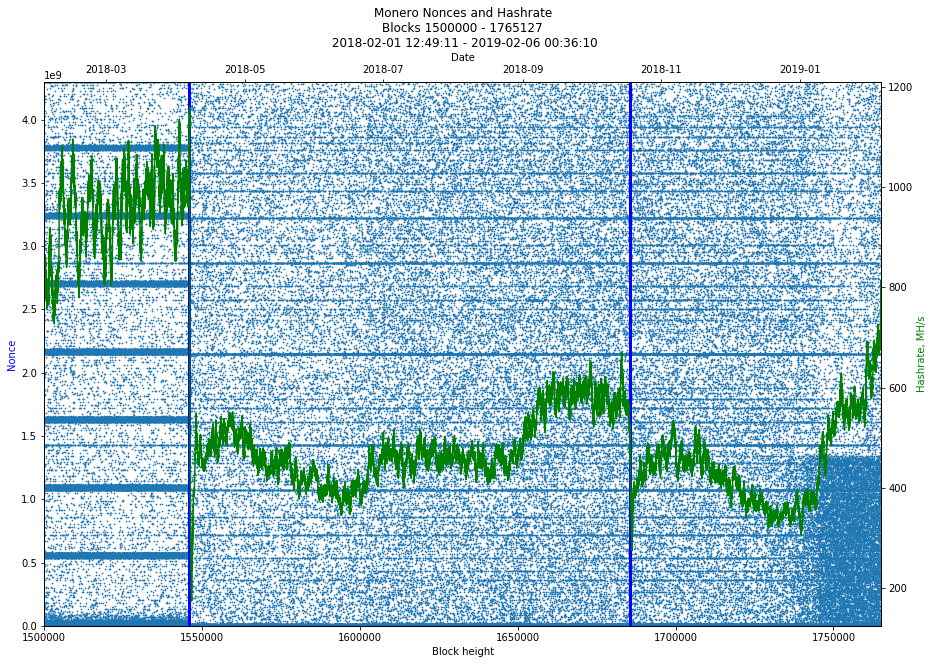

In [3]:
import datetime
plot_alts = 0
df = pd.read_csv("../data/nonce-difficulty-1500000.csv")

pow_v7_fork_height = 1546000
pow_v8_fork_height = 1685555
block_time_sec = 120

block_start = min(df.height)
block_end = max(df.height)
date_start = datetime.datetime.utcfromtimestamp(min(df.timestamp))
date_end = datetime.datetime.utcfromtimestamp(max(df.timestamp))

fig, ax = plt.subplots(figsize=(15, 10))
if plot_alts != 1:
    plt.scatter(df.height, df.nonce, s=0.5)
if plot_alts:
    color_att = 0.8
    tr_main = plt.scatter(df.height, df.nonce, c=(color_att,color_att,color_att), s=0.6)
    tr_alt = plt.scatter(alt_df.height, alt_df.nonce, c='r', s=6)
plt.title('Monero Nonces and Hashrate\nBlocks {} - {}\n {} - {}'.format(block_start, block_end, date_start, date_end))
plt.xlabel('Block height')
plt.ylabel('Nonce', color='blue')
plt.axvline(x=pow_v7_fork_height, c='blue', linewidth=3)
plt.axvline(x=pow_v8_fork_height, c='blue', linewidth=3)
ax.set_xlim(block_start, block_end)
ax.set_ylim(0, 2**32)

ax2 = ax.twinx()
hashrate_mh_s = df.difficulty*1e-6/block_time_sec
tr_hash = ax2.plot(df.height, hashrate_mh_s, 'green')
ax2.set_ylabel('Hashrate, MH/s', color='green')

ax3 = ax.twiny()
ax3.set_xlabel("Date")
ax3.set_xlim(date_start, date_end)

plt.show()

## Import audio libraries

In [4]:
import matplotlib.pyplot as plt;
from IPython.display import Audio;
import numpy as np;
import io;
import soundfile as sf;
import demosongs;
import pysynth_beeper;
import pysynth;
import pysynth_b;
import pysynth_c;
import pysynth_d;
import pysynth_e;
import pysynth_p;
import pysynth_s;

Piano key frequencies (for equal temperament):
Key number	Scientific name	Frequency (Hz)
         1	             A0	         27.50
         2	            A#0	         29.14
         3	             B0	         30.87
         4	             C1	         32.70
         5	            C#1	         34.65
         6	             D1	         36.71
         7	            D#1	         38.89
         8	             E1	         41.20
         9	             F1	         43.65
        10	            F#1	         46.25
        11	             G1	         49.00
        12	            G#1	         51.91
        13	             A1	         55.00
        14	            A#1	         58.27
        15	             B1	         61.74
        16	             C2	         65.41
        17	            C#2	         69.30
        18	             D2	         73.42
        19	            D#2	         77.78
        20	             E2	         82.41
        21	             F2	         87.31
        22	            F#2	  

In [5]:
notes = pd.read_csv('notefile.csv')
notes.head()

index note   freq
0      1   A0  27.50
1      2  A#0  29.14
2      3   B0  30.87
3      4   C1  32.70
4      5  C#1  34.65

## First, show with a demo song

In [6]:
ss = demosongs.song4_rh
speed_coeff = 2
song = [(s[0].lower(), s[1]*speed_coeff) for s in ss]
song[0:10]

[('e', 16),
 ('f#', 16),
 ('g*', 8),
 ('f#', 16),
 ('e', 16),
 ('d#*', 8),
 ('e', 16),
 ('f#', 16),
 ('b3*', 8),
 ('c#', 16)]

In [7]:
buffer = io.BytesIO()

pysynth_s.make_wav(song, fn=buffer)

buffer.seek(0)

#wav = buffer.getvalue()
data, samplerate = sf.read(buffer)

[1/52]	
[5/52]	
[9/52]	
[13/52]	
[17/52]	
[21/52]	
[25/52]	
[29/52]	
[33/52]	
[37/52]	
[41/52]	
[45/52]	
[49/52]	
Writing to file <_io.BytesIO object at 0x7f4ba920c518>



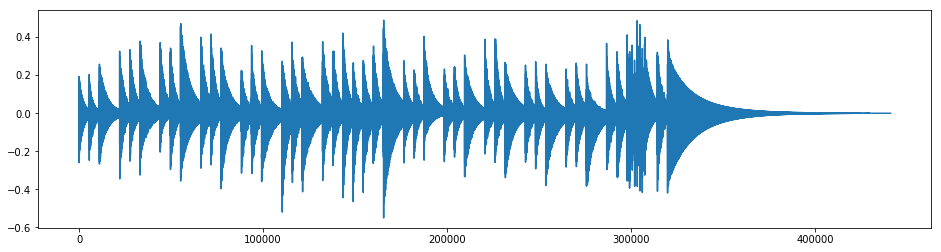

In [8]:
plt.figure(figsize=(16,4))
plt.plot(data)

In [9]:
Audio(data, rate=samplerate)

## Now construct the nonce music

In [10]:
note_duration = 1
min_freq = min(notes.freq)
max_freq = max(notes.freq)
freq_range = max_freq - min_freq
piano_keys = 87
max_nonce = 2**32

nonce_track = df.nonce[0:10]
notes.head()

index note   freq
0      1   A0  27.50
1      2  A#0  29.14
2      3   B0  30.87
3      4   C1  32.70
4      5  C#1  34.65

In [11]:
nonce_keys = copy(list(nonce_track))
counter = 0
for nonce in nonce_track:
    scaled_nonce = round(nonce/max_nonce*piano_keys)
    nonce_keys[counter] = notes.note[scaled_nonce]
    counter = counter + 1
    # print('***')
    # print(nonce)
    # print(scaled_nonce)
    # print(notes.note[scaled_nonce])

In [12]:
nonce_song = [(k.lower(), note_duration) for k in nonce_keys]

In [13]:
buffer = io.BytesIO()

pysynth_s.make_wav(nonce_song, fn=buffer)

buffer.seek(0)

#wav = buffer.getvalue()
data, samplerate = sf.read(buffer)

[1/10]	
[5/10]	
[9/10]	
Writing to file <_io.BytesIO object at 0x7f4ba90f9f10>



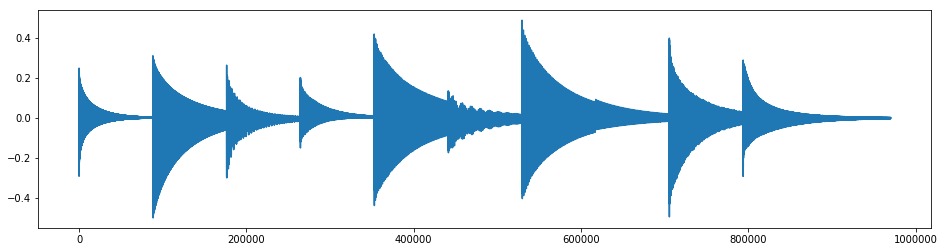

In [14]:
plt.figure(figsize=(16,4))
plt.plot(data)

In [15]:
Audio(data, rate=samplerate)